# EXp 1

### Importing the necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch as to
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

### Importing the MNIST dataset

In [2]:
img = pd.read_csv("../data/trainMNIST.csv")
img = img.values
img = np.reshape(img, (-1, 28, 28))
label = pd.read_csv("../data/trainMNISTlabels.csv").values

In [3]:
train = img[:50000]
label_tr = label[:50000]
test = img[50000:]
label_ts = label[50000:]

In [4]:
class neural_nonlinearity(nn.Module):
    
    def __init__(self):
        
        super(neural_nonlinearity,self).__init__()
        self.linear = nn.Linear(4,1)

    def forward(self,x):

        o1 = nn.functional.relu(x)
        o2 = to.sigmoid(x)
        o3 = nn.functional.selu(x)
        o4 = to.tanh(x)

        shape = o1.size()

        o1 = o1.view(1,-1)
        o2 = o2.view(1,-1)
        o3 = o3.view(1,-1)
        o4 = o4.view(1,-1)

        out = to.cat((o1,o2,o3,o4), 0)

        out = out.t()      
        
        out = self.linear(out)
        
        out = out.view(shape)
        
        return out
    
    

In [5]:
class MNIST(Dataset):
    
    def __init__(self, img, lbl):
        
        self.image = img
        self.label = lbl
    
    
    def __getitem__(self, idx):
            
        image = to.tensor(np.reshape(self.image[idx],(1,28,28)), dtype=to.float32)
        label = to.tensor(self.label[idx][0],dtype=to.int64)
            
        return  image, label
            
    def __len__(self):
        
        return 10000

In [6]:
class mnist(nn.Module):
    
    def __init__(self):
        super(mnist,self).__init__()
        
        # A simple two layer convolution followed by three fully connected layers should do
        
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3)
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3)
        
        self.pool1 = nn.MaxPool2d( kernel_size=2, stride=2)
        self.pool2 = nn.MaxPool2d( kernel_size=3)
        
        self.lin1 = nn.Linear(144, 64)
        self.lin2 = nn.Linear(64, 32)
        self.lin3 = nn.Linear(32, 10)
        
        self.nonlin1 = neural_nonlinearity()
        self.nonlin2 = neural_nonlinearity()
        
    def forward(self,x):
        
        # forwarding the input through the layers
          
        out = self.pool1(self.nonlin1(self.conv1(x)))
        out = self.pool2(self.nonlin2(self.conv2(out)))
        
        out = out.view(-1,144)
        
        out = nn.functional.relu(self.lin1(out))
        out = nn.functional.relu(self.lin2(out))
        out = self.lin3(out)
        
        return out
    
    
    def evaluate(self, x):
        
        # this can be used later for evalutation
        
        m = to.tensor(1.0, dtype=to.float32)
        
        if type(m) != type(x):
            x = to.tensor(x, dtype = to.float32, requires_grad = False)
        
        x = x.view(-1,1,28,28)
        
        with to.no_grad():
            
            out1 = self.forward(x)
            
            return out1
        

## Training

Defining necessary parameters

In [7]:
trainer = MNIST(train,label_tr)
tester = MNIST(test,label_ts)

train_dataloader = DataLoader(trainer, shuffle=True, batch_size= 16,
                        num_workers=8)

test_dataloader = DataLoader(tester, shuffle=True, batch_size= 16,
                        num_workers=4)

model = mnist()

In [8]:
number_epochs = 100
Criterion = nn.CrossEntropyLoss()
Optimizer = to.optim.Adam(model.parameters(),lr = 0.001 )

In [9]:
counter = []
loss_history = [] 
iteration_number= 0

In [10]:
for epoch in range(0,number_epochs):
    
    for data in train_dataloader:
   
        img, lbl = data
    
        Optimizer.zero_grad()
        
        out = model(img)
        
        loss = Criterion(out,lbl)
        
        loss.backward()
        
        Optimizer.step()
    
    # printing the training errors
    
    print("Epoch number {}\n  Current loss {}\n".format(epoch,loss.item()))
    counter.append(epoch)
    loss_history.append(loss.item())
    


Epoch number 0
  Current loss 0.19136746227741241

Epoch number 1
  Current loss 0.06064101308584213

Epoch number 2
  Current loss 0.04529200494289398

Epoch number 3
  Current loss 0.006215274333953857

Epoch number 4
  Current loss 0.004727691411972046

Epoch number 5
  Current loss 0.006658628582954407

Epoch number 6
  Current loss 0.20073221623897552

Epoch number 7
  Current loss 0.00118979811668396

Epoch number 8
  Current loss 0.009428739547729492

Epoch number 9
  Current loss 0.01448887586593628

Epoch number 10
  Current loss 0.009070217609405518

Epoch number 11
  Current loss 0.21107423305511475

Epoch number 12
  Current loss 0.4771535396575928

Epoch number 13
  Current loss 0.00031757354736328125

Epoch number 14
  Current loss 0.007293403148651123

Epoch number 15
  Current loss 0.025362640619277954

Epoch number 16
  Current loss 0.0002410411834716797

Epoch number 17
  Current loss 0.0001284480094909668

Epoch number 18
  Current loss 0.0017965734004974365

Epoch n

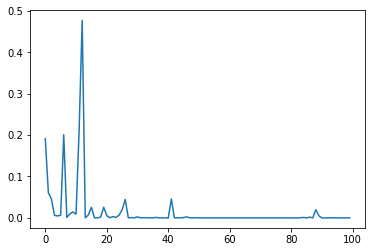

In [14]:
plt.plot(counter,loss_history)
plt.savefig("exp3_result")

In [21]:
loss_history = []

for data in test_dataloader:
   
        img, lbl = data
    
        with to.no_grad():        
            out = model(img)
            loss = Criterion(out,lbl)
        
        loss_history.append(loss.item())
        print(loss)


tensor(0.0001)
tensor(8.3447e-07)
tensor(0.0000)
tensor(0.0012)
tensor(0.6594)
tensor(0.1706)
tensor(0.0418)
tensor(0.0089)
tensor(0.2939)
tensor(0.0001)
tensor(5.3644e-07)
tensor(0.0001)
tensor(0.0629)
tensor(0.0102)
tensor(0.)
tensor(0.0001)
tensor(0.9999)
tensor(1.1921e-07)
tensor(1.1899)
tensor(0.2940)
tensor(0.1672)
tensor(0.4357)
tensor(0.4299)
tensor(9.2685e-06)
tensor(0.7361)
tensor(0.0002)
tensor(0.1068)
tensor(0.1231)
tensor(0.0017)
tensor(2.2054e-06)
tensor(1.1803)
tensor(0.1345)
tensor(0.6077)
tensor(2.7418e-06)
tensor(0.0000)
tensor(5.9605e-08)
tensor(0.0008)
tensor(0.0915)
tensor(0.7506)
tensor(0.0000)
tensor(4.7684e-07)
tensor(0.2600)
tensor(0.0002)
tensor(0.0642)
tensor(0.3440)
tensor(0.0476)
tensor(0.0026)
tensor(0.7524)
tensor(1.0653)
tensor(0.0000)
tensor(0.0864)
tensor(0.0000)
tensor(5.9605e-08)
tensor(0.0000)
tensor(0.5220)
tensor(0.0000)
tensor(0.0009)
tensor(0.0163)
tensor(0.4647)
tensor(0.5037)
tensor(0.0356)
tensor(8.3447e-06)
tensor(1.5893)
tensor(0.0556)
tens

IndexError: Traceback (most recent call last):
  File "/home/rishi/.local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/rishi/.local/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 106, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "<ipython-input-5-92daaec89147>", line 11, in __getitem__
    image = to.tensor(np.reshape(self.image[idx],(1,28,28)), dtype=to.float32)
IndexError: index 9999 is out of bounds for axis 0 with size 9999


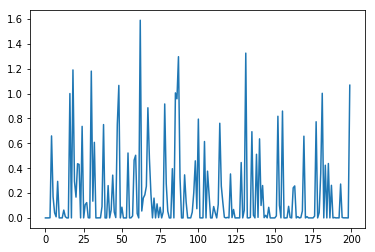

In [25]:
plt.plot(loss_history[:200])
plt.savefig("exp3_loss")

In [26]:
to.save(model.state_dict(), "exp3_result")